In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Importing Data

In [29]:
turnovers = pd.read_csv('/Users/iansheridan/Desktop/UCD/Turnovers1.csv')
turnovers.head()

,iD MATCH,SAISON,COMPETITION,BLOC,SEMAINE,DATE,JOURNEE,DOMICILE,EXTERIEUR,MATCH,Start time,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R,PORTEUR -
0,475,2020-2021,PRO D2,BLOC 5 - DENALI,S32,12/02/2021,J19,USAP,USC,J19 USAP - USC,"5828,883019968",Quentin Etienne,ARRIERE,USAP,USC,Dropped Ball Unforced,22 - 50,L,NaN
1,475,2020-2021,PRO D2,BLOC 5 - DENALI,S32,12/02/2021,J19,USAP,USC,J19 USAP - USC,"1224,163019968",Julien Facundo,PILIER,USC,USAP,Dropped Ball Unforced,50 - 22,R,NaN
2,475,2020-2021,PRO D2,BLOC 5 - DENALI,S32,12/02/2021,J19,USAP,USC,J19 USAP - USC,"6230,363019968",Christiaan van der Merwe,SECONDE LIGNE,USC,USAP,Carried Into Touch,22 - GL,R,NaN
3,475,2020-2021,PRO D2,BLOC 5 - DENALI,S32,12/02/2021,J19,USAP,USC,J19 USAP - USC,"603,283019968",Rynard Landman,SECONDE LIGNE,USC,USAP,Dropped Ball Unforced,50 - 22,CL,NaN
4,475,2020-2021,PRO D2,BLOC 5 - DENALI,S32,12/02/2021,J19,USAP,USC,J19 USAP - USC,"5915,563019968",Darrell Dyer,TROISIEME LIGNE AILE,USC,USAP,Dropped Ball Unforced,22 - 50,C,NaN


In [30]:
## Slice the Dataset to only include relevant data
turnover = turnovers[['iD MATCH','DATE','DOMICILE','EXTERIEUR','JOUEUR','POSTE','EQUIPE','ADV','TYPE TURNOVER CONCEDE','Field Area','Field L-R']]
turnover.head()

,iD MATCH,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
0,475,12/02/2021,USAP,USC,Quentin Etienne,ARRIERE,USAP,USC,Dropped Ball Unforced,22 - 50,L
1,475,12/02/2021,USAP,USC,Julien Facundo,PILIER,USC,USAP,Dropped Ball Unforced,50 - 22,R
2,475,12/02/2021,USAP,USC,Christiaan van der Merwe,SECONDE LIGNE,USC,USAP,Carried Into Touch,22 - GL,R
3,475,12/02/2021,USAP,USC,Rynard Landman,SECONDE LIGNE,USC,USAP,Dropped Ball Unforced,50 - 22,CL
4,475,12/02/2021,USAP,USC,Darrell Dyer,TROISIEME LIGNE AILE,USC,USAP,Dropped Ball Unforced,22 - 50,C


In [31]:
turnover.dtypes

iD MATCH                  int64
DATE                     object
DOMICILE                 object
EXTERIEUR                object
JOUEUR                   object
POSTE                    object
EQUIPE                   object
ADV                      object
TYPE TURNOVER CONCEDE    object
Field Area               object
Field L-R                object
dtype: object

Analysing Data

In [32]:
turnover.set_index('iD MATCH')

,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
iD MATCH,,,,,,,,,,
475,12/02/2021,USAP,USC,Quentin Etienne,ARRIERE,USAP,USC,Dropped Ball Unforced,22 - 50,L
475,12/02/2021,USAP,USC,Julien Facundo,PILIER,USC,USAP,Dropped Ball Unforced,50 - 22,R
475,12/02/2021,USAP,USC,Christiaan van der Merwe,SECONDE LIGNE,USC,USAP,Carried Into Touch,22 - GL,R
475,12/02/2021,USAP,USC,Rynard Landman,SECONDE LIGNE,USC,USAP,Dropped Ball Unforced,50 - 22,CL
475,12/02/2021,USAP,USC,Darrell Dyer,TROISIEME LIGNE AILE,USC,USAP,Dropped Ball Unforced,22 - 50,C
...,...,...,...,...,...,...,...,...,...,...
354,25/09/2020,OYO,AIX,Tony Ensor,ARRIERE,OYO,AIX,Dropped Ball Forced,50 - 22,CL
354,25/09/2020,OYO,AIX,Tony Ensor,ARRIERE,OYO,AIX,Dropped Ball Unforced,22 - 50,CR
354,25/09/2020,OYO,AIX,Tony Ensor,ARRIERE,OYO,AIX,Dropped Ball Unforced,22 - 50,R


In [33]:
## Sort the dataset by match id so that they are in order.
turnover = turnover.sort_values('iD MATCH')
turnover.head

<bound method NDFrame.head of       iD MATCH        DATE DOMICILE EXTERIEUR              JOUEUR  \
603        325  04/09/2020     SAXV       AIX           Ledua Mau   
615        325  04/09/2020     SAXV       AIX      Hikairo Forbes   
616        325  04/09/2020     SAXV       AIX    Jerome Mondoulet   
617        325  04/09/2020     SAXV       AIX        Tyrone Viiga   
604        325  04/09/2020     SAXV       AIX  Shalva Sutiashvili   
...        ...         ...      ...       ...                 ...   
3067       508  11/03/2021     USAP       AIX  Jean-Bernard Pujol   
3068       508  11/03/2021     USAP       AIX    Julien Ledevedec   
3069       508  11/03/2021     USAP       AIX       Charles Malet   
3046       508  11/03/2021     USAP       AIX     Quentin Walcker   
3060       508  11/03/2021     USAP       AIX      George Tilsley   

                       POSTE EQUIPE   ADV  TYPE TURNOVER CONCEDE Field Area  \
603                   CENTRE   SAXV   AIX  Dropped Ball Unforc

In [34]:
## Set the index to match id
turnover = turnover.set_index('iD MATCH')
turnover.head()

,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
iD MATCH,,,,,,,,,,
325,04/09/2020,SAXV,AIX,Ledua Mau,CENTRE,SAXV,AIX,Dropped Ball Unforced,22 - 50,R
325,04/09/2020,SAXV,AIX,Hikairo Forbes,TALONNEUR,AIX,SAXV,Carried Into Touch,50 - 22,L
325,04/09/2020,SAXV,AIX,Jerome Mondoulet,SECONDE LIGNE,AIX,SAXV,Bad Pass,GL - 22,L
325,04/09/2020,SAXV,AIX,Tyrone Viiga,TROISIEME LIGNE CENTRE,AIX,SAXV,Dropped Ball Unforced,22 - GL,CL
325,04/09/2020,SAXV,AIX,Shalva Sutiashvili,SECONDE LIGNE,SAXV,AIX,Lost at Breakdown,22 - 50,L


In [35]:
np_turnover = np.array(turnover)
print(np_turnover.shape)

(4405, 10)


In [36]:
#Check nulls
turnover.isnull().sum()/len(turnover)

DATE                     0.000000
DOMICILE                 0.002270
EXTERIEUR                0.000681
JOUEUR                   0.003178
POSTE                    0.012486
EQUIPE                   0.000454
ADV                      0.000000
TYPE TURNOVER CONCEDE    0.002497
Field Area               0.000908
Field L-R                0.000000
dtype: float64

In [37]:
#Check percentage of nulls
turnover.isnull().sum()/len(turnover)*100

DATE                     0.000000
DOMICILE                 0.227015
EXTERIEUR                0.068104
JOUEUR                   0.317821
POSTE                    1.248581
EQUIPE                   0.045403
ADV                      0.000000
TYPE TURNOVER CONCEDE    0.249716
Field Area               0.090806
Field L-R                0.000000
dtype: float64

In [38]:
turnover = turnover.dropna()

In [40]:
np_turnover = np.array(turnover)
print(np_turnover.shape)

(4312, 10)


In [9]:
turnover.head()

,iD MATCH,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
0,475,12/02/2021,USAP,USC,Quentin Etienne,ARRIERE,USAP,USC,Dropped Ball Unforced,22 - 50,L
1,475,12/02/2021,USAP,USC,Julien Facundo,PILIER,USC,USAP,Dropped Ball Unforced,50 - 22,R
2,475,12/02/2021,USAP,USC,Christiaan van der Merwe,SECONDE LIGNE,USC,USAP,Carried Into Touch,22 - GL,R
3,475,12/02/2021,USAP,USC,Rynard Landman,SECONDE LIGNE,USC,USAP,Dropped Ball Unforced,50 - 22,CL
4,475,12/02/2021,USAP,USC,Darrell Dyer,TROISIEME LIGNE AILE,USC,USAP,Dropped Ball Unforced,22 - 50,C


In [64]:
## Check the number of different turnovers contained in the dataset
print(turnover['TYPE TURNOVER CONCEDE'].nunique())

16


In [16]:
turnover.head()

,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
iD MATCH,,,,,,,,,,
325,04/09/2020,SAXV,AIX,Ledua Mau,CENTRE,SAXV,AIX,Dropped Ball Unforced,22 - 50,R
325,04/09/2020,SAXV,AIX,Hikairo Forbes,TALONNEUR,AIX,SAXV,Carried Into Touch,50 - 22,L
325,04/09/2020,SAXV,AIX,Jerome Mondoulet,SECONDE LIGNE,AIX,SAXV,Bad Pass,GL - 22,L
325,04/09/2020,SAXV,AIX,Tyrone Viiga,TROISIEME LIGNE CENTRE,AIX,SAXV,Dropped Ball Unforced,22 - GL,CL
325,04/09/2020,SAXV,AIX,Shalva Sutiashvili,SECONDE LIGNE,SAXV,AIX,Lost at Breakdown,22 - 50,L


Visualise

In [18]:
## Analyse the number of each type of turnover and plot them
turnover['TYPE TURNOVER CONCEDE'].value_counts()

Dropped Ball Unforced    1647
Lost at Breakdown         703
Dropped Ball Forced       692
Carried Into Touch        350
Forward Pass              226
Bad Pass                  199
Failure To Find Touch     151
Bad Offload               122
Accidental Knock On       108
Attempted Intercept        34
Accidental Offside         24
Other                      23
Carried Back in Goal       19
Offside at Restart          6
5 Second Rule               5
Grounding                   3
Name: TYPE TURNOVER CONCEDE, dtype: int64

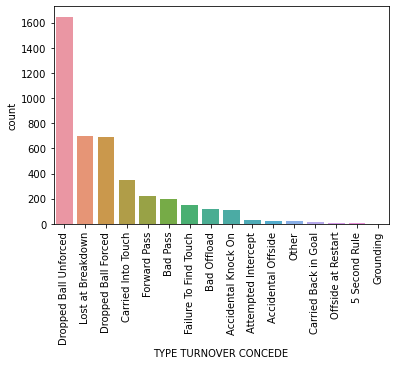

In [19]:
types = sns.countplot(x='TYPE TURNOVER CONCEDE', data=turnover, order=turnover['TYPE TURNOVER CONCEDE'].value_counts().index)
for item in types.get_xticklabels():
    item.set_rotation(90)

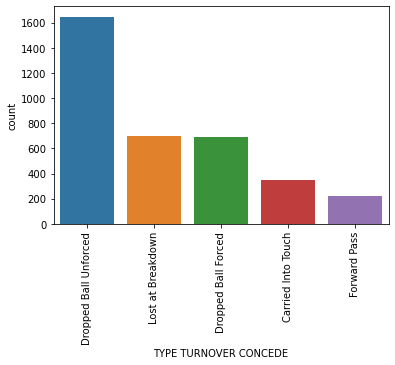

In [45]:
## Top 5 types of Turnover
types = sns.countplot(x='TYPE TURNOVER CONCEDE', data=turnover, order=turnover['TYPE TURNOVER CONCEDE'].value_counts().iloc[:5].index)
for item in types.get_xticklabels():
    item.set_rotation(90)

In [20]:
## Identify what teams were committing the most amount of turnovers
turnover['TYPE TURNOVER CONCEDE'].unique()
unique=turnover['TYPE TURNOVER CONCEDE'].nunique()/turnover['TYPE TURNOVER CONCEDE'].count()

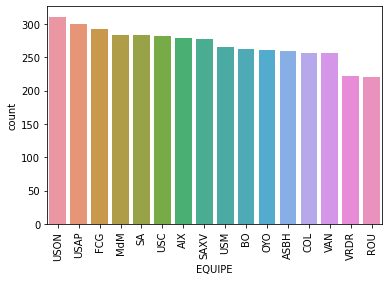

In [21]:
teams = sns.countplot(x='EQUIPE', data=turnover, order=turnover['EQUIPE'].value_counts().index)
for item in teams.get_xticklabels():
    item.set_rotation(90)

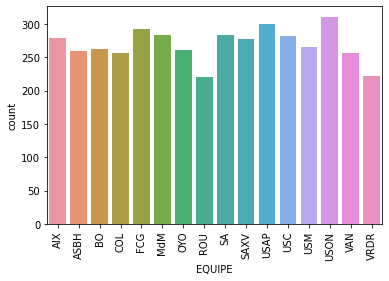

In [22]:
## Sort the teams alphabetically
teams = sns.countplot(x='EQUIPE', data=turnover, order=sorted(turnover['EQUIPE'].value_counts().index))
for item in teams.get_xticklabels():
    item.set_rotation(90)

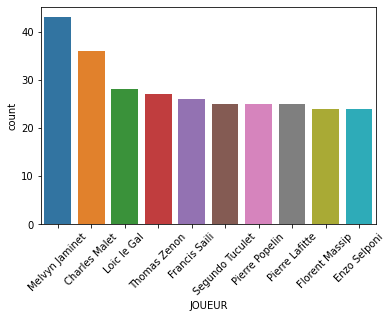

In [29]:
## Using iloc to slice the top 10 players from the dataset
individuals = sns.countplot(x='JOUEUR', data=turnover, order=(turnover['JOUEUR'].value_counts().iloc[:10].index))
for item in individuals.get_xticklabels():
    item.set_rotation(45)

In [ ]:
## Analyse turnovers by position

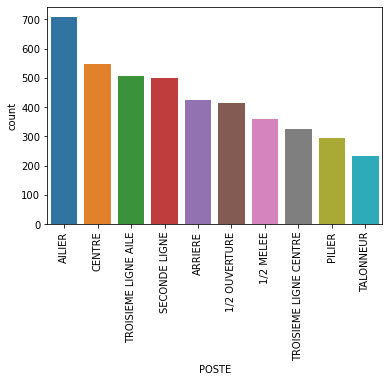

In [33]:
positions = sns.countplot(x='POSTE', data=turnover, order=turnover['POSTE'].value_counts().index)
for item in positions.get_xticklabels():
    item.set_rotation(90)

In [34]:
## Use slicing to analyse a specific game
saxv = turnover.iloc[0:19, 5:]
print(saxv)

         EQUIPE   ADV  TYPE TURNOVER CONCEDE Field Area Field L-R
iD MATCH                                                         
325        SAXV   AIX  Dropped Ball Unforced    22 - 50         R
325         AIX  SAXV     Carried Into Touch    50 - 22         L
325         AIX  SAXV               Bad Pass    GL - 22         L
325         AIX  SAXV  Dropped Ball Unforced    22 - GL        CL
325        SAXV   AIX      Lost at Breakdown    22 - 50         L
325        SAXV   AIX  Failure To Find Touch    GL - 22         R
325        SAXV   AIX      Lost at Breakdown    50 - 22         C
325        SAXV   AIX    Dropped Ball Forced    22 - GL         L
325         AIX  SAXV  Dropped Ball Unforced    50 - 22         L
325        SAXV   AIX      Lost at Breakdown    50 - 22         L
325         AIX  SAXV  Dropped Ball Unforced    50 - 22        CR
325         AIX  SAXV  Dropped Ball Unforced    22 - 50         R
325         AIX  SAXV           Forward Pass    50 - 22        CR
325       

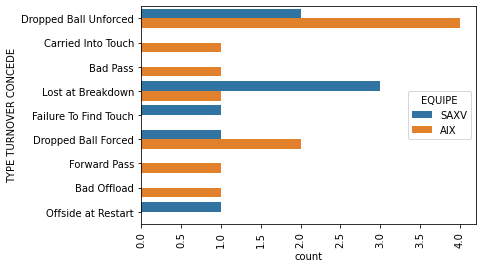

In [95]:
#Analysing game specific turnovers
game_one = sns.countplot(data=saxv, y='TYPE TURNOVER CONCEDE', hue='EQUIPE')
for item in game_one.get_xticklabels():
    item.set_rotation(90)

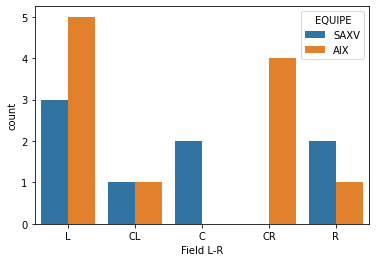

In [122]:
game_one = sns.countplot(data=saxv, x='Field L-R', hue = 'EQUIPE', order=['L','CL','C','CR','R'])
for item in game_one.get_xticklabels():
    item.set_rotation(0)

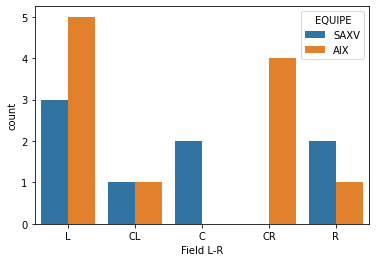

In [128]:
game_two = sns.countplot(data=saxv, x='Field L-R', hue = 'EQUIPE', order=['L','CL','C','CR','R'])
for item in game_two.get_xticklabels():
    item.set_rotation(0)

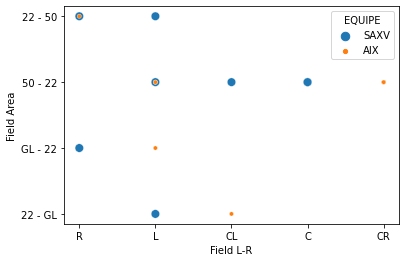

In [130]:
game_oneone = sns.scatterplot(data=saxv, y='Field Area', x='Field L-R', hue='EQUIPE', size='EQUIPE')

In [38]:
#Identifying the league winners and analysing their performance
usap = turnover[turnover['EQUIPE']=='USAP']
usap.head()

,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
iD MATCH,,,,,,,,,,
326,03/09/2020,BO,USAP,Siua Halanukonuka,PILIER,USAP,BO,Dropped Ball Unforced,50 - 22,L
326,03/09/2020,BO,USAP,Pierre Lucas,CENTRE,USAP,BO,Lost at Breakdown,22 - GL,R
326,03/09/2020,BO,USAP,Sadek Deghmache,1/2 MELEE,USAP,BO,Dropped Ball Unforced,22 - 50,CL
326,03/09/2020,BO,USAP,Matteo Rodor,1/2 OUVERTURE,USAP,BO,Bad Offload,22 - GL,L
326,03/09/2020,BO,USAP,Lucas Dubois,AILIER,USAP,BO,Carried Into Touch,50 - 22,R


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

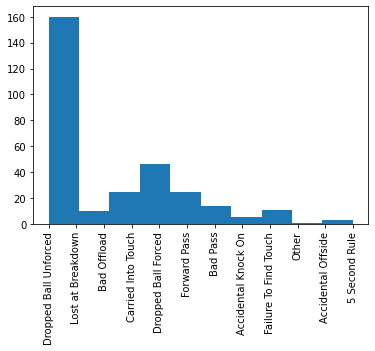

In [39]:
## Using a histogram to identfy the types of turnover commited by the league champions
hist = plt.hist(usap['TYPE TURNOVER CONCEDE'])
plt.xticks(rotation=90)

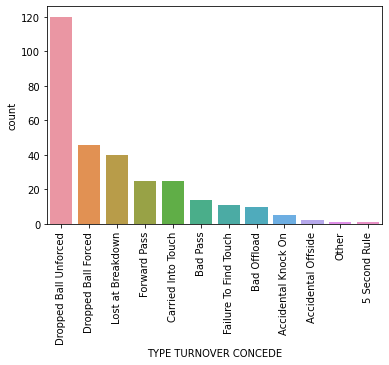

In [40]:
## Histogram was not easy to read there for plotting the turnovers in seaborn
usap_types = sns.countplot(x='TYPE TURNOVER CONCEDE', data=usap, order=usap['TYPE TURNOVER CONCEDE'].value_counts().index)
for item in usap_types.get_xticklabels():
    item.set_rotation(90)

In [45]:
## Now compare to the team who finished 2nd Vannes
van = turnover[turnover['EQUIPE']=='VAN']
van.head(2)

,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
iD MATCH,,,,,,,,,,
332,04/09/2020,VAN,SA,Pagakalasio Tafili,PILIER,VAN,SA,Dropped Ball Unforced,50 - 22,CR
332,04/09/2020,VAN,SA,Gregoire Bazin,TROISIEME LIGNE AILE,VAN,SA,Lost at Breakdown,50 - 22,CL


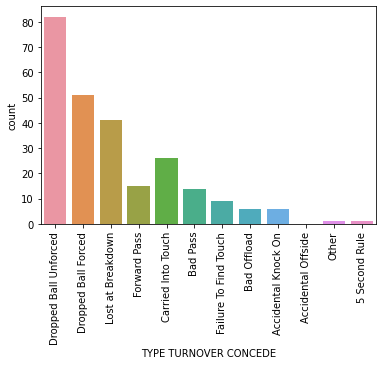

In [46]:
van_types = sns.countplot(x='TYPE TURNOVER CONCEDE', data=van, order=usap['TYPE TURNOVER CONCEDE'].value_counts().index)
for item in van_types.get_xticklabels():
    item.set_rotation(90)

Surprisingly USAP had more unforced dropped ball turnovers than Vannes

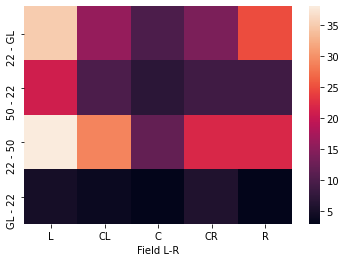

In [47]:
def get_heatmap(turnover, ax=None):
    pivoted = pd.pivot_table(usap, values="DATE", index=["Field L-R"], columns=["Field Area"], aggfunc=len)
    # Get the columns/indices in the right order
    pivoted.columns = ['22 - GL', '50 - 22', '22 - 50', 'GL - 22']
    pivoted = pivoted.reindex(['L', 'CL', 'C', 'CR', 'R'])
    return sns.heatmap(pivoted.T, ax=ax)
a = get_heatmap(turnover)

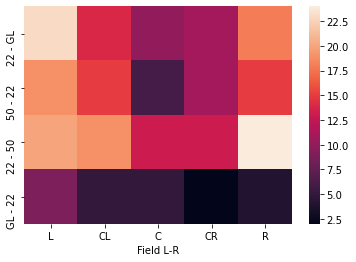

In [48]:
def get_heatmap(turnover, ax=None):
    pivoted = pd.pivot_table(van, values="DATE", index=["Field L-R"], columns=["Field Area"], aggfunc=len)
    # Get the columns/indices in the right order
    pivoted.columns = ['22 - GL', '50 - 22', '22 - 50', 'GL - 22']
    pivoted = pivoted.reindex(['L', 'CL', 'C', 'CR', 'R'])
    return sns.heatmap(pivoted.T, ax=ax)
a = get_heatmap(turnover)

The heatmaps show that USAP are conceding less turnovers when in attacking positions

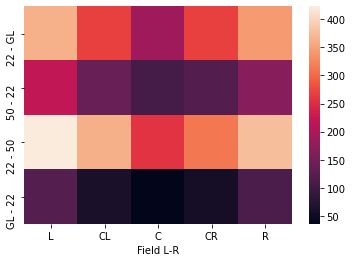

In [41]:
## Using a heatmap to identify the areas on the pitch that most turnovers occur for the whole league
def get_heatmap(turnover, ax=None):
    pivoted = pd.pivot_table(turnover, values="DATE", index=["Field L-R"], columns=["Field Area"], aggfunc=len)
    # Get the columns/indices in the right order
    pivoted.columns = ['22 - GL', '50 - 22', '22 - 50', 'GL - 22']
    pivoted = pivoted.reindex(['L', 'CL', 'C', 'CR', 'R'])
    return sns.heatmap(pivoted.T, ax=ax)
a = get_heatmap(turnover)

In [ ]:
## Using heatmaps to identify the area on the pitch where each team commits a turnover

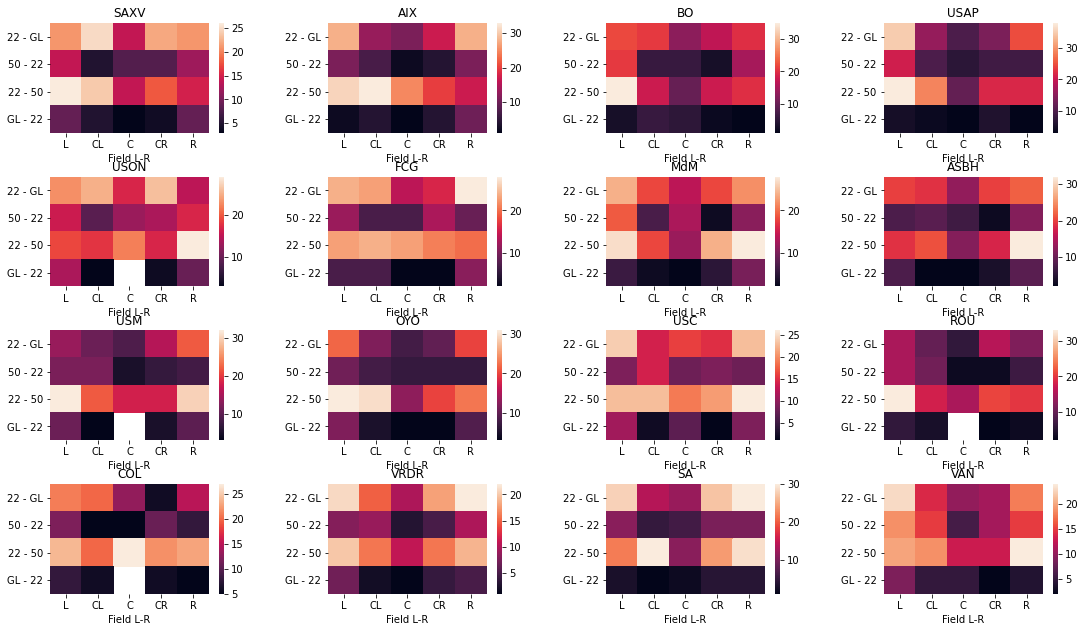

In [42]:
all_teams = turnover['EQUIPE'].unique()
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, team in enumerate(all_teams):
    ax = fig.add_subplot(4, 4, i+1)
    ax.title.set_text(team)
    get_heatmap(turnover[turnover['EQUIPE'] == team], ax=ax)

In [43]:
## Analysing averrage number of turnovers while playing Home v Away
def home_versus_away(turnover):
    home = round(turnover[turnover['DOMICILE'] == turnover ['EQUIPE']].groupby('iD MATCH').count()['DATE'].mean(), 3)
    print(f'Turnovers per home game: {home}')

    away = round(turnover[turnover['DOMICILE'] != turnover ['EQUIPE']].groupby('iD MATCH').count()['DATE'].mean(), 3)
    print(f'Turnovers per away game: {away}')

home_versus_away(turnover)

Turnovers per home game: 11.647
Turnovers per away game: 11.788


In [44]:
all_teams = sorted(turnover['EQUIPE'].unique())
for i, team in enumerate(all_teams):
    print(team)
    home_versus_away(turnover[turnover['EQUIPE'] == team])
    print('\n')

AIX
Turnovers per home game: 11.455
Turnovers per away game: 12.75


ASBH
Turnovers per home game: 13.182
Turnovers per away game: 9.583


BO
Turnovers per home game: 10.667
Turnovers per away game: 12.182


COL
Turnovers per home game: 11.5
Turnovers per away game: 10.818


FCG
Turnovers per home game: 11.545
Turnovers per away game: 13.833


MdM
Turnovers per home game: 11.917
Turnovers per away game: 10.846


OYO
Turnovers per home game: 12.364
Turnovers per away game: 10.417


ROU
Turnovers per home game: 9.636
Turnovers per away game: 9.5


SA
Turnovers per home game: 11.583
Turnovers per away game: 13.091


SAXV
Turnovers per home game: 12.417
Turnovers per away game: 11.636


USAP
Turnovers per home game: 14.0
Turnovers per away game: 12.0


USC
Turnovers per home game: 11.25
Turnovers per away game: 13.364


USM
Turnovers per home game: 11.667
Turnovers per away game: 11.364


USON
Turnovers per home game: 13.091
Turnovers per away game: 13.917


VAN
Turnovers per home game: 10

USAP who finished top conceded the highest number of turnovers at home compared to the other teams. On average 2
more turnovers per game at home compared to SAXV who finished bottom of the table.